In [83]:
import csv 
import pandas as pd
import os
import numpy as np
import io
import string
import unicodedata
import re
from collections import Counter
import matplotlib.pyplot as plt
import operator

In [84]:
def getAllQueryFiles(file_path=None):
    if file_path == None:
        files_path=os.path.join(os.getcwd(), "Queries")
    files_list= os.listdir(files_path)
    files_list=[file_name for file_name in files_list if not file_name.endswith("_cleaned.csv") and file_name.rstrip(".csv").isdigit()] #to select only the files named '1.csv','2.csv','3.csv'..etc
    return [os.path.join(files_path, i) for i in files_list]

def getAllCleanedQueryFiles(file_path=None):
    if file_path == None:
        files_path=os.path.join(os.getcwd(), "Queries")
    files_list= os.listdir(files_path)
    files_list=[file_name for file_name in files_list if file_name.endswith("_cleaned.csv")] #to select only the cleaned files
    return [os.path.join(files_path, i) for i in files_list]

In [85]:
def cleanQueryFile(input_csv_path,start_line_value=7,include_header=True):
    '''

    Libs used here: csv

    Files needed cleaning because:
    1. The file has the first (6) rows as info on the file.
    2. The file had its last rows as info on the day index (date) and page views.
    3. The file had rows that were not queries, but only resources used inside the website.
    
    Inputs:
    
    input_csv_path : String. Full path of csv file.
    start_line_value : Integer. Number of row where column headers are.
    include_header : Boolean. Whether to inlcude the header in the cleaned file
    
    
    '''
    cntr=0                 #Loop Counter to count rows. In case we need to index any rows.
    #start_line_value       #Line at which the data starts (after info on the file)
    rows_with_problems=[]   #Rows with problems. Should be empty after resolving all the problems with the rows. Made for debugging.
    non_useful_rows=[]      #Rows with no queries (resources inside the website)
    

    #-------------------------------------------------------------------------------------------------------#
    #THE NEXT LINE OF CODE WILL GENERATE AN ERROR IN PYTHON 2, PLEASE CHECK THIS TO FIX IT: 
    # https://stackoverflow.com/questions/3348460/csv-file-written-with-python-has-blank-lines-between-each-row
    #-------------------------------------------------------------------------------------------------------#

    with open(input_csv_path, 'r') as inp, open(input_csv_path[:-4]+'_cleaned.csv', 'w') as out:
    #Replace the next line with the previous line for Python 2.7
#     with io.open(input_csv_path, 'r',encoding='utf-8') as inp, io.open(input_csv_path[:-4]+'_cleaned.csv', 'w',encoding='utf-8',newline='') as out:
        #Note the UTF-8 encoding up. The default here is ascii, but will cause problems with queries like: ðŸ‘ŒðŸ¼
        writer = csv.writer(out)
        for row in csv.reader(inp):
            
            #debug#print(cntr)
            cntr+=1

            #Write the Columns First:
            if (cntr==start_line_value and include_header):
                writer.writerow(row)

            #Check for links:
            if(cntr > start_line_value and len(row)>0):
                link=row[0]

                if(link==''): #Then, we reached the end of the links.
                    break
#                 elif(cntr>start_line_value): #We have links after this row. Before is just file info.

#                     if((link.find('search-apo'))!=-1): #That is just to skip the lines where there is no link.
#                         to_check=link.find('search-apo')+len('search-apo') #check the position after the 'search-apo'
#                         if(len(link)<=to_check):
#                             writer.writerow(row) #Zero length query. Include it. 
#                         elif(link[to_check]!='/'):
#                             non_useful_rows.append(cntr)
#                             if(link[to_check]!='?'):
#                                 print('Weird! Line #',cntr,'This is a link with no "\" nor "?" after search-apo.. what is it ?: \n',link)
#                             #debug#print('Here is a non_useful row, because there is no query:\n',link)
#                         else:
#                              try:
#                                     writer.writerow(row)
#                              except:
#                                     rows_with_problems.append(cntr)
#                     else:
#                         non_useful_rows.append(cntr)
#                         print('Weird ! Line #',cntr,' This is a link with no search-apo, please check it out and solve the issue:',link)
    
                writer.writerow(row)
                
                
        if len(rows_with_problems) !=0:
            print('Please note that rows: ', rows_with_problems,'have problems.')
            
        print('Rows ended at:',cntr)
        print('Total rows with queries:',cntr-start_line_value-len(non_useful_rows)-1)
        return cntr-start_line_value-len(non_useful_rows)-1 #-1 since the last line is not included, -1 for the header line (in start line value)

In [86]:
# files_full_path.sort()
# file_cntr=0 #Count Files, starting at first file=1 (not zero..it increments in the first loop before reading the file.)
# total_useful_rows=0


# for file_path in files_full_path:
#     file_cntr+=1
#     print('File #',file_cntr)
#     total_useful_rows+=apo_cleaner(file_path,start_line_value=7,include_header=True)
        
# print('\n\n------------------------------------------------------------------------------')
# print('Therefore there is a total of',total_useful_rows,'rows with queries in the',len(files_full_path),'files.')

In [87]:

# def get_query(link):
#     start_pos=link.find('search-apo')+len('search-apo')+1
#     link_after_start_pos=link[start_pos:]
#     if(link_after_start_pos.find('?')!=-1):
#         end_pos=len(link[:start_pos])+link_after_start_pos.find('?')
#     else:
#         end_pos=len(link)
#     return link[start_pos:end_pos]


# def get_query_length(link):
#     return len(link.split())

In [88]:
def cleanAllQueryFiles(allfiles):
    for i, file in enumerate(allfiles):
        print("File", i+1)
        cleanQueryFile(file,start_line_value=7,include_header=True)
        print("-----------------")

In [89]:
def mergeAllQueryFilesToADataframe(allcleanedfiles):
    # new_files_list=os.listdir(files_path)
    # cleaned_files_list=[file_name for file_name in new_files_list if file_name.find('cleaned')!=-1]
    # cleaned_files_full_path=[files_path+'/'+ f for f in cleaned_files_list]
    # cleaned_files_full_path = getAllCleanedQueryFiles()
    df = pd.concat([pd.read_csv(f) for f in allcleanedfiles], ignore_index = True, sort= False)
    # df['Query Length']=df['Search Query'].apply(get_query_length)
    df['Query Length']=df['Search Query'].apply(lambda x: len(str(x).split()))
    return df

In [90]:
def get_n_grams(list_of_characters,n=2):
    '''
    returns a list of n_grams from a string or list of characters. n=2 as default.
    '''
    n_grams=[]
    for i in range(len(list_of_characters)-(n-1)):
        n_grams.append(list_of_characters[i:i+n])
    return n_grams

In [91]:
def get_n_gram_fingerprint(input_query,n=2):

    #1. change all characters to their lowercase representation
    lowered=input_query.lower()

    #2. remove all punctuation, whitespace, and control characters
    stripped=lowered.strip() #remove leading and trailing whitespaces
    remove_list=string.punctuation+' ' #list of characters to remove: punctuations and white spaces
    no_punct=[character for character in lowered if (character not in remove_list)  ] #create list of needed characters
    no_punct=''.join(no_punct) # join them into one string



    #3. normalize extended western characters to their ASCII representation (for example "gödel" → "godel")
    #import unicodedata
    normalized=unicodedata.normalize('NFKD', no_punct).encode('ascii','ignore').decode("utf-8")
    #source: https://stackoverflow.com/questions/3194516/replace-special-characters-with-ascii-equivalent

    #4. obtain all the string n-grams
    n_grams= get_n_grams(normalized,n)


    #5. sort the n-grams and remove duplicates
    sorted_n_grams=np.unique(n_grams[:]) #remove duplicates
    sorted_n_grams.sort() #sort tokens

    #6. join the sorted n-grams back together
    key= ''.join(sorted_n_grams)
    
    return key

def get_one_gram_fingerprint(input_query):
    return get_n_gram_fingerprint(input_query,n=1)

def get_two_gram_fingerprint(input_query):
    return get_n_gram_fingerprint(input_query,n=2)
  
def get_three_gram_fingerprint(input_query):
    return get_n_gram_fingerprint(input_query,n=3)

In [92]:
#from: https://norvig.com/spell-correct.html



def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def correct_query(query):
    return ' '.join([correction(wrd) for wrd in words(query)])

In [93]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1f' % float(height),
                ha='center', va='bottom' , fontsize=9)

In [94]:
# The root directory of all your files
files_path = os.getcwd()
queries_folder = os.path.join(files_path, 'Queries')

In [95]:
# The directory where all query files exits
query_files_dir = None   

In [120]:
# get all file paths
files_full_path = getAllQueryFiles(query_files_dir)

print("All query files are: \n")
print('\n'.join(map(str, files_full_path)))

All query files are: 

/home/rajib/Workspace/Python/Wish Na/Queries/7.csv
/home/rajib/Workspace/Python/Wish Na/Queries/10.csv
/home/rajib/Workspace/Python/Wish Na/Queries/4.csv
/home/rajib/Workspace/Python/Wish Na/Queries/3.csv
/home/rajib/Workspace/Python/Wish Na/Queries/12.csv
/home/rajib/Workspace/Python/Wish Na/Queries/2.csv
/home/rajib/Workspace/Python/Wish Na/Queries/1.csv
/home/rajib/Workspace/Python/Wish Na/Queries/11.csv
/home/rajib/Workspace/Python/Wish Na/Queries/5.csv
/home/rajib/Workspace/Python/Wish Na/Queries/8.csv
/home/rajib/Workspace/Python/Wish Na/Queries/6.csv
/home/rajib/Workspace/Python/Wish Na/Queries/9.csv


In [97]:
# sort the query files list alphabetically
files_full_path.sort()

In [98]:
# clean all the query files
print("\nCleaning the files :\n")
cleanAllQueryFiles(files_full_path)


Cleaning the files :

File 1
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 2
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 3
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 4
Rows ended at: 1345
Total rows with queries: 1337
-----------------
File 5
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 6
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 7
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 8
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 9
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 10
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 11
Rows ended at: 5008
Total rows with queries: 5000
-----------------
File 12
Rows ended at: 5008
Total rows with queries: 5000
-----------------


In [99]:
# get the cleaned files
cleaned_files_dir = None
cleaned_files_full_path = getAllCleanedQueryFiles(cleaned_files_dir)

In [100]:
# Merge the cleaned files
print("\nMerging all cleaned files: -------\n")
df = mergeAllQueryFilesToADataframe(cleaned_files_full_path)
df.head(3)
# len(df)


Merging all cleaned files: -------



,Search Query,Source/Medium,Clicks,Impressions,CTR,Average Position,Query Length
0,buy kids quad bikes in melbourne,google / organic,0,2,0.00%,98.0,6
1,buy new units westmead,google / organic,0,1,0.00%,60.0,4
2,buy paro robot,google / organic,0,1,0.00%,99.0,3


In [101]:
# compute query length
print("\nComputing and adding query length :---------\n")
df['Query Length']=df['Search Query'].apply(lambda x: len(str(x).split()))
df.tail(3)


Computing and adding query length :---------



,Search Query,Source/Medium,Clicks,Impressions,CTR,Average Position,Query Length
56334,where does halal certification money go,google / organic,0,6,0.00%,65.0,6
56335,where does my tax go,google / organic,0,31,0.00%,10.0,5
56336,where does my tax money go,google / organic,0,19,0.00%,12.0,6


In [102]:
# Sort dataframe by query lenght and save it in csv
print("\nSorted By query length: -------\n")
sorted_df=df.sort_values(by='Query Length')
sorted_df.to_csv(os.path.join(queries_folder, 'Sorted_All.csv'), index = None, header=True)    
sorted_df.head(3)


Sorted By query length: -------



,Search Query,Source/Medium,Clicks,Impressions,CTR,Average Position,Query Length
26846,mclnerney,google / organic,0,7,0.00%,1.7,1
5712,13.5*1.3,google / organic,0,2,0.00%,70.0,1
48528,ittima,google / organic,0,3,0.00%,5.0,1


In [103]:
# GET PERCENTAGE OF QUERIES <= 19 words:
limit=19
# tem_dict=dict(df)
# lengths=np.array(tem_dict['Query Length'])
# cntr=len(lengths[lengths<=limit])
cntr = len(df[df["Query Length"] <= 19])/len(df)
print ("\n"+str(cntr*100)[:5],'% of the queries have length less than or equal',limit,'.\n' )


99.44 % of the queries have length less than or equal 19 .



In [104]:
# Get all 1, 2, 3 grams of the query string and put it in separate columns
# df['Query']=df['Page'].apply(get_query)
df['KeyWord']=df['Search Query'].apply(get_one_gram_fingerprint)
df['2-gram fingerprint']=df['Search Query'].apply(get_two_gram_fingerprint)
df['3-gram fingerprint']=df['Search Query'].apply(get_three_gram_fingerprint)

In [105]:
# Make the spellings right of all the queries in a new column Norvig-Spell-Corrected
# If you already have the saved dataframe with this column just import it else uncomment the code below
# and save the result
# df['Norvig-Spell-Corrected']=df['Search Query'].apply(correct_query)
# df.to_csv (os.path.join(files_path, 'All_With_Info.csv'), index = None, header=True)
print("Spell corrected :---------\n")
df['Norvig-Spell-Corrected'] = pd.read_csv(os.path.join(queries_folder,'All_With_Info.csv'))["Norvig-Spell-Corrected"]
df.head(3)

Spell corrected :---------



,Search Query,Source/Medium,Clicks,Impressions,CTR,Average Position,Query Length,KeyWord,2-gram fingerprint,3-gram fingerprint,Norvig-Spell-Corrected
0,buy kids quad bikes in melbourne,google / organic,0,2,0.00%,98.0,6,abdeiklmnoqrsuy,adbibobudbdselesidikinkekilbmenenmouqurnsisqua...,adbbikboubuydbidsqelbesiidsikeinmkeskidlbomeln...,buy kiss quand bites in melbourne
1,buy new units westmead,google / organic,0,1,0.00%,60.0,4,abdeimnstuwy,adbueaesewitmenenistswtmtsunuywewuyn,buyeadestewuitsmeanewnitstmswetmetswuniuynwesw...,buy new units westmead
2,buy paro robot,google / organic,0,1,0.00%,99.0,3,aboprtuy,arbobuoborotparouyyp,arobotbuyobooroparrobroruypypa,buy part root


In [106]:
## GET HISTOGRAM
print("\nQuerry lengths.Indices represents query length and value represents count : -----\n")
lengths = df["Query Length"].values
inds=np.array(range(np.max(lengths)+1))
hist_=np.zeros(inds.shape, dtype="int64")
for leng in lengths:
    hist_[leng]+=1
hist_


Querry lengths.Indices represents query length and value represents count : -----



array([    0,  1505, 11019, 18085, 13504,  6276,  2810,  1302,   647,
         341,   180,    86,    83,    48,    42,    26,    25,    22,
          10,    12,    11,    17,     8,    14,    14,     8,    10,
          14,     7,     1,     8,     9,     6,     5,     7,    11,
          12,     8,     6,    18,    21,     9,    12,     8,     7,
           1,     5,     1,     1,     2,     2,     2,     1,     1,
           2,     0,     1,     0,     0,     0,     0,     1,     0,
           0,     0,     0,     2,     0,     1,     1,     0,     0,
           1,     1,     0,     1,     1,     1,     1,     0,     2,
           1,     1,     1,     1,     1,     0,     0,     0,     0,
           1,     1,     2,     0,     1,     0,     0,     0,     0,
           0,     1,     0,     0,     1,     1,     0,     0,     1,
           0,     0,     0,     0,     2,     0,     1,     2,     2,
           2,     0,     0,     0,     0,     0,     1,     0,     0,
           1,     1,

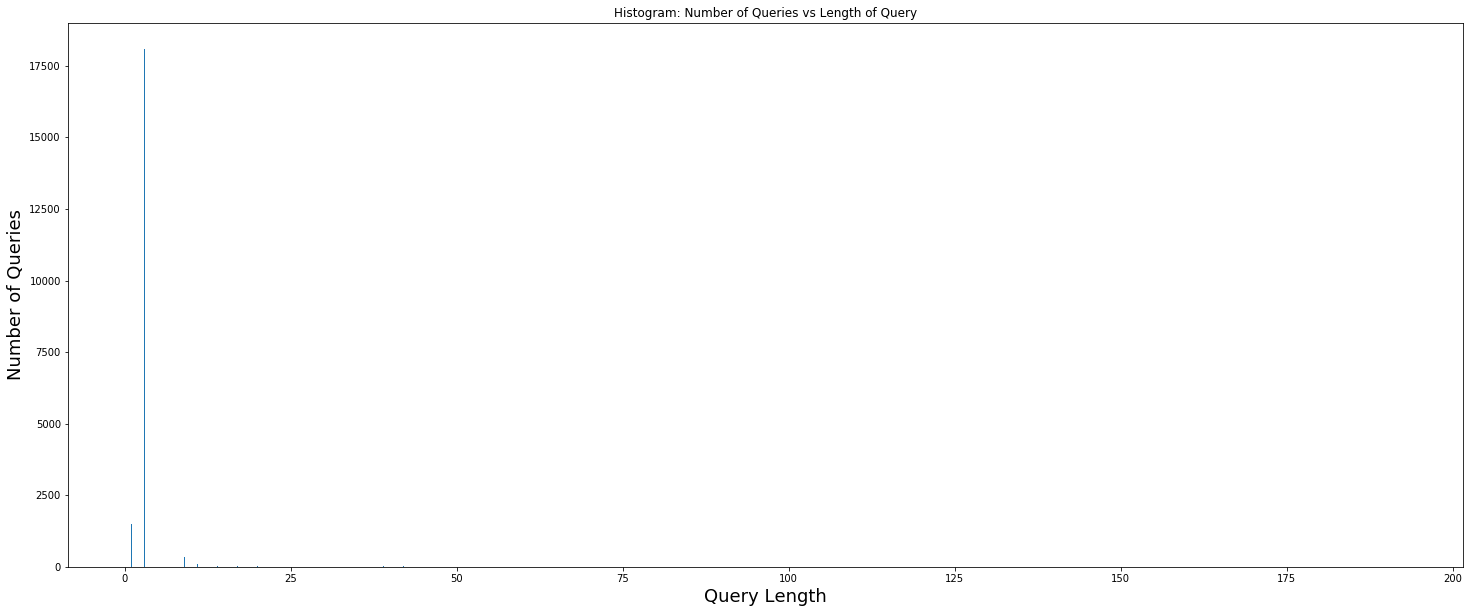

In [107]:
# Plotting the histogram of query lengths and count 
plt.figure(figsize=(25,10))
_ = plt.hist(lengths, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram: Number of Queries vs Length of Query")
plt.xlabel('Query Length',fontsize=18)
plt.ylabel('Number of Queries',fontsize=18)
plt.show()

In [108]:
# Removing outliers and saving the result in a file
print("\nRemoving outliers:-----------")
no_outliers=df[df['Query Length']<=limit]
no_outliers.to_csv(os.path.join(queries_folder, 'No_Outliers.csv'), index = None, header=True)
print ('Number of rows left after removing outliers is:', len(no_outliers))


Removing outliers:-----------
Number of rows left after removing outliers is: 56023


In [109]:
# Keeping only unique queries
# We are using the n-grams(all 1, 2, 3) to check for query duplicacy
print("\nRemoving repeated query strings :----------")
our_dict=dict(no_outliers) #our_dict=dict(df)
indices_of_non_repeated_1_gram=[]
indices_of_non_repeated_2_gram=[]
indices_of_non_repeated_3_gram=[]
indices_of_non_repeated_p_norvig=[]
indices_of_repeated_1_gram=[]
indices_of_repeated_2_gram=[]
indices_of_repeated_3_gram=[]
indices_of_repeated_p_norvig=[]
Queries=list(our_dict['Search Query'])
KeyWords=list(our_dict['KeyWord'])
bi_grams=list(our_dict['2-gram fingerprint'])
tri_grams=list(our_dict['3-gram fingerprint'])
norvigs=list(our_dict['Norvig-Spell-Corrected'])
session_types=list(our_dict['Source/Medium'])
#1-gram
for i in range(1,len(KeyWords)): #1 is used here since session length is one before  
    if not ((KeyWords[i-1]==KeyWords[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(Queries[i])
        indices_of_non_repeated_1_gram.append(i)
    if ((KeyWords[i-1]==KeyWords[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(i+2,Queries[i]) #i+2 is the index in the excel sheet. i is the index in df
        indices_of_repeated_1_gram.append(i)
#2-gram
for i in range(1,len(KeyWords)): #1 is used here since session length is one before  
    if not ((bi_grams[i-1]==bi_grams[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(Queries[i])
        indices_of_non_repeated_2_gram.append(i)
    if ((bi_grams[i-1]==bi_grams[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(i+2,Queries[i]) #i+2 is the index in the excel sheet. i is the index in df
        indices_of_repeated_2_gram.append(i)
#3-gram
for i in range(1,len(KeyWords)): #1 is used here since session length is one before  
    if not ((tri_grams[i-1]==tri_grams[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(Queries[i])
        indices_of_non_repeated_3_gram.append(i)
    if ((tri_grams[i-1]==tri_grams[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(i+2,Queries[i]) #i+2 is the index in the excel sheet. i is the index in df
        indices_of_repeated_3_gram.append(i)
#norvigs
for i in range(1,len(KeyWords)): #1 is used here since session length is one before  
    if not ((norvigs[i-1]==norvigs[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(Queries[i])
        indices_of_non_repeated_p_norvig.append(i)
    if ((norvigs[i-1]==norvigs[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(i+2,Queries[i]) #i+2 is the index in the excel sheet. i is the index in df
        indices_of_repeated_p_norvig.append(i)
Cleaned_Queries_1_gram=no_outliers.iloc[indices_of_non_repeated_1_gram]
Cleaned_Queries_2_gram=no_outliers.iloc[indices_of_non_repeated_2_gram]
Cleaned_Queries_3_gram=no_outliers.iloc[indices_of_non_repeated_3_gram]
Cleaned_Queries_p_norvig=no_outliers.iloc[indices_of_non_repeated_p_norvig]
print ("According to 1-gram, there are "+str(len(indices_of_repeated_1_gram))+" repeated queries.")
print ("According to 2-gram, there are "+str(len(indices_of_repeated_2_gram))+" repeated queries.")
print ("According to 3-gram, there are "+str(len(indices_of_repeated_3_gram))+" repeated queries.")
print ("According to p_norvig's method, there are "+str(len(indices_of_repeated_p_norvig))+" repeated queries.")


Removing repeated query strings :----------
According to 1-gram, there are 1650 repeated queries.
According to 2-gram, there are 221 repeated queries.
According to 3-gram, there are 200 repeated queries.
According to p_norvig's method, there are 240 repeated queries.


In [110]:
#Queries that 1-gram detected as repeated but 2-gram and 3-gram did not.
print("\nqueries that 1-gram detected as repeated but 2-gram and 3-gram did not.:----------")
different_indices=[x for x in indices_of_repeated_1_gram if x not in indices_of_repeated_2_gram ]
for indx in different_indices: 
    print (" "*5, Queries[indx-1])
    print (" "*5, Queries[indx])
    print (" "*6, "---------------------------------")


queries that 1-gram detected as repeated but 2-gram and 3-gram did not.:----------
      buy tiny house australia
      buy tiny houses australia
       ---------------------------------
      ca australian political party
      ca party australian politics
       ---------------------------------
      cadbury australia halal
      cadbury halal australia
       ---------------------------------
      calabrian mafia australia
      calabrian mafia in australia
       ---------------------------------
      campbelltown housing
      campbelltown housing commission
       ---------------------------------
      camperdown postcode vic
      camperdown victoria postcode
       ---------------------------------
      canadian consulate brisbane
      canadian consulate canberra
       ---------------------------------
      canadian consulate in melbourne
      canadian consulate melbourne
       ---------------------------------
      canberra crime rates
      canberra crime statisti

      newcastle library renew
       ---------------------------------
      newcastle railway station nsw
      newcastle railway stations
       ---------------------------------
      nhmrc australian dietary guidelines
      nhmrc dietary guidelines
       ---------------------------------
      nhvr journey planner
      nhvr journey planner app
       ---------------------------------
      nick mead values and professional knowledge in teacher education download
      nick mead values and professional knowledge in teacher education pdf
       ---------------------------------
      nick mead values and professional knowledge in teacher education pdf
      nick mead values and professional knowledge in teacher education torrent
       ---------------------------------
      no fault divorce
      no fault divorce act
       ---------------------------------
      non pbs pharmaceuticals
      non pbs pharmaceuticals bupa
       ---------------------------------
      non pbs phar

       ---------------------------------
      mobile dating site
      mobile dating sites
       ---------------------------------
      mobile tiny house australia
      mobile tiny house brisbane
       ---------------------------------
      mobile tiny house for sale
      mobile tiny house for sale australia
       ---------------------------------
      mobile tiny house for sale australia
      mobile tiny house for sale brisbane
       ---------------------------------
      mobile tiny house for sale brisbane
      mobile tiny house for sale melbourne
       ---------------------------------
      mobility scooter insurance
      mobility scooter insurance australia
       ---------------------------------
      model criminal
      model criminal code
       ---------------------------------
      monitoring and evaluating
      monitoring and evaluation
       ---------------------------------
      morena meaning in maori
      morena meaning maori
       ----------------

       ---------------------------------
      shaun osborne adelaide liberal
      shaun osborne liberal adelaide
       ---------------------------------
      shunsuke managi wealth inclusive growth and sustainability
      shunsuke managi wealth inclusive growth and sustainability download
       ---------------------------------
      simply energy solar feed in tariff
      simply energy solar feed in tariff sa
       ---------------------------------
      singapore embassy brisbane
      singapore embassy in brisbane
       ---------------------------------
      single fathers support
      single fathers support group
       ---------------------------------
      social community home care and disability services award
      social community home care and disability services industry award
       ---------------------------------
      social housing provider
      social housing providers
       ---------------------------------
      social housing regulation
      social 

In [111]:
# Save the cleaned queries in different files
print("\nSaving the Cleaned queries:---------")
Cleaned_Queries_1_gram.to_csv(os.path.join(queries_folder, 'Cleaned_Queries_1_gram.csv'), index = None, header=True)
Cleaned_Queries_2_gram.to_csv(os.path.join(queries_folder, 'Cleaned_Queries_2_gram.csv'), index = None, header=True)
Cleaned_Queries_3_gram.to_csv(os.path.join(queries_folder, 'Cleaned_Queries_3_gram.csv'), index = None, header=True)
print("\nSaved")


Saving the Cleaned queries:---------

Saved


In [112]:
# Separating the internal and external queries
print("\nSeparating the internal and external queries :------------")
our_dict=dict(no_outliers)
session_types=list(our_dict['Source/Medium'])
# internal_all_indices=[]
external_all_indices=[]
for i in range(len(session_types)):
    
#     if (session_types[i].find('(direct)')!=-1): #if internal
#         #debug#print(i+2,session_types[i]) #i+2 is the index in the excel sheet. i is the index in df
#         internal_all_indices.append(i)
#     else: #external
    external_all_indices.append(i)            
# internal_all_df=no_outliers.iloc[internal_all_indices]
# internal_all_df.to_csv(os.path.join(files_path, 'internal_all_queries.csv'), index = None, header=True)
external_all_df=no_outliers.iloc[external_all_indices]
external_all_df.to_csv(os.path.join(queries_folder, 'external_all_queries.csv'), index = None, header=True) 


Separating the internal and external queries :------------


In [113]:
# print("\nInternal queries summary:")
# internal_all_df.describe()

In [114]:
print("\nExternal queries summary:")
external_all_df.describe()


External queries summary:


,Clicks,Average Position,Query Length
count,56023.000000,56023.000000,56023.000000
mean,0.017136,58.140198,3.640273
std,0.359878,26.694280,1.667570
min,0.000000,1.000000,1.000000
25%,0.000000,39.000000,3.000000
50%,0.000000,59.000000,3.000000
75%,0.000000,79.000000,4.000000
max,59.000000,270.000000,19.000000


In [115]:
# Separating the internal and external queries strings that unique and cleaned
Cleaned_Queries=Cleaned_Queries_1_gram
cleaned_queries_dict=dict(Cleaned_Queries)
session_types_unique=list(cleaned_queries_dict['Source/Medium'])
# internal_indices=[]
external_indices=[]
for i in range(len(session_types_unique)): 
    
#     if (session_types_unique[i].find('(direct)')!=-1): #if internal
#         #debug#print(i+2,session_types[i]) #i+2 is the index in the excel sheet. i is the index in df
#         internal_indices.append(i)
#     else: #external
    external_indices.append(i)
# internal_clean_df=Cleaned_Queries.iloc[internal_indices]
# internal_clean_df.to_csv(os.path.join(files_path, 'internal_clean_queries.csv'), index = None, header=True)
external_clean_df=Cleaned_Queries.iloc[external_indices]
external_clean_df.to_csv(os.path.join(queries_folder, 'external_clean_queries.csv'), index = None, header=True)  

In [116]:
# Finding the most frequent words and saving them
print("\nFinding most frequent words:---------")
query_list=our_dict['Search Query'].tolist()
query_list=[x.lower() for x in query_list]
query_text=' '.join(query_list)
dict_counted_words=Counter(words(query_text))    
#sort words by their count:
sorted_counted_words=sorted(dict_counted_words.items(), key=operator.itemgetter(1),reverse=True)
#remove those words:
stop_words=set(['and','of','the','in','on','for','to','s'])
sorted_counted_words_cleaned=[x for x in sorted_counted_words if x[0] not in stop_words]
top_n=20
# #print top_n:
# print(sorted_counted_words_cleaned[:top_n])
print ("We have "+str(len(query_list))+" quereies. Only "+str(len(set(query_list)))+" of them are unique.")
print ("We have "+str(len(set(words(query_text))))+" unique words.")
most_frequent_words_df = pd.DataFrame({"Words": [t[0] for t in sorted_counted_words_cleaned ], "Counts": [t[1] for t in sorted_counted_words_cleaned]}).head(top_n)
most_frequent_words_df.to_csv(os.path.join(queries_folder, 'frequent_words.csv'), index = None, header=True)


Finding most frequent words:---------
We have 56023 quereies. Only 56023 of them are unique.
We have 21519 unique words.


In [46]:
# Reproducing graphs
# Summary of query lengths for internal and queries
#internal
# internal_unique_mean=internal_clean_df.mean()['Query Length']
# internal_all_mean=internal_all_df.mean()['Query Length']
#external
external_unique_mean=external_clean_df.mean()['Query Length']
external_all_mean=external_all_df.mean()['Query Length']
print ('Average Number of Words per Query')
print ('---------------------------')
print ('        -External-         ')
print ('____________________________')
print ('|     All         Unique   |')
print ('|    '+str(external_all_mean)[:4]+'          '+str(external_unique_mean)[:4]+'    |')
print ('|--------------------------|')

Average Number of Words per Query
---------------------------
        -External-         
____________________________
|     All         Unique   |
|    3.64          3.62   |
|--------------------------|


In [117]:
#Ploting internal external queries in bar graph
lengths=np.array(range(19))
#internal
# internal_clean_counts=np.array(list(internal_clean_df.groupby('Query Length').count()['Search Query']))
# internal_clean_counts=internal_clean_counts*100/np.sum(internal_clean_counts,axis=0)
# old_internal_all_counts=np.array(list(internal_all_df.groupby('Query Length').count()['Search Query']))
# old_internal_all_counts=old_internal_all_counts*100/np.sum(old_internal_all_counts,axis=0)
# internal_all_counts=np.zeros(19)
# for i in range(19):
#     if(i<16 and i < len(internal_all_counts) and i < len(old_internal_all_counts)):
#         internal_all_counts[i]=old_internal_all_counts[i]
#     elif(i==16 and i < len(internal_all_counts)):
#         internal_all_counts[i]=0
#     elif(i < len(old_internal_all_counts) and i < len(internal_all_counts)):
#         internal_all_counts[i+1]=old_internal_all_counts[i]
#external
external_clean_counts=np.array(list(external_clean_df.groupby('Query Length').count()['Search Query']))
external_clean_counts=external_clean_counts*100/np.sum(external_clean_counts,axis=0)
external_all_counts=np.array(external_all_df.groupby('Query Length').count()['Search Query'].values)
external_all_counts=external_all_counts*100/np.sum(external_all_counts,axis=0)    

In [118]:
# # #FIGURE 5:
# fig, ax = plt.subplots(figsize=(40,10))
# ind = lengths   # the x locations for the groups
# width = 0.3      # the width of the bars
# if(len(internal_all_counts) > 0 and len(internal_clean_counts) > 0):
#     p1 = ax.bar(ind, internal_all_counts, width, bottom=0 )
#     p2 = ax.bar(ind + width, internal_clean_counts, width, bottom=0)
#     ax.set_title('Percentage Vs Query Length for Internal Searches')
#     ax.set_xticks(ind + width / 2)
#     ax.set_xticklabels(lengths)
#     plt.xlabel('Query Length', fontsize=18)
#     plt.ylabel('Percentage',  fontsize=18)
#     ax.legend((p1[0], p2[0]), ('All', 'Unique'))
#     ax.autoscale_view()
#     autolabel(p1)
#     autolabel(p2)
#     plt.show()  


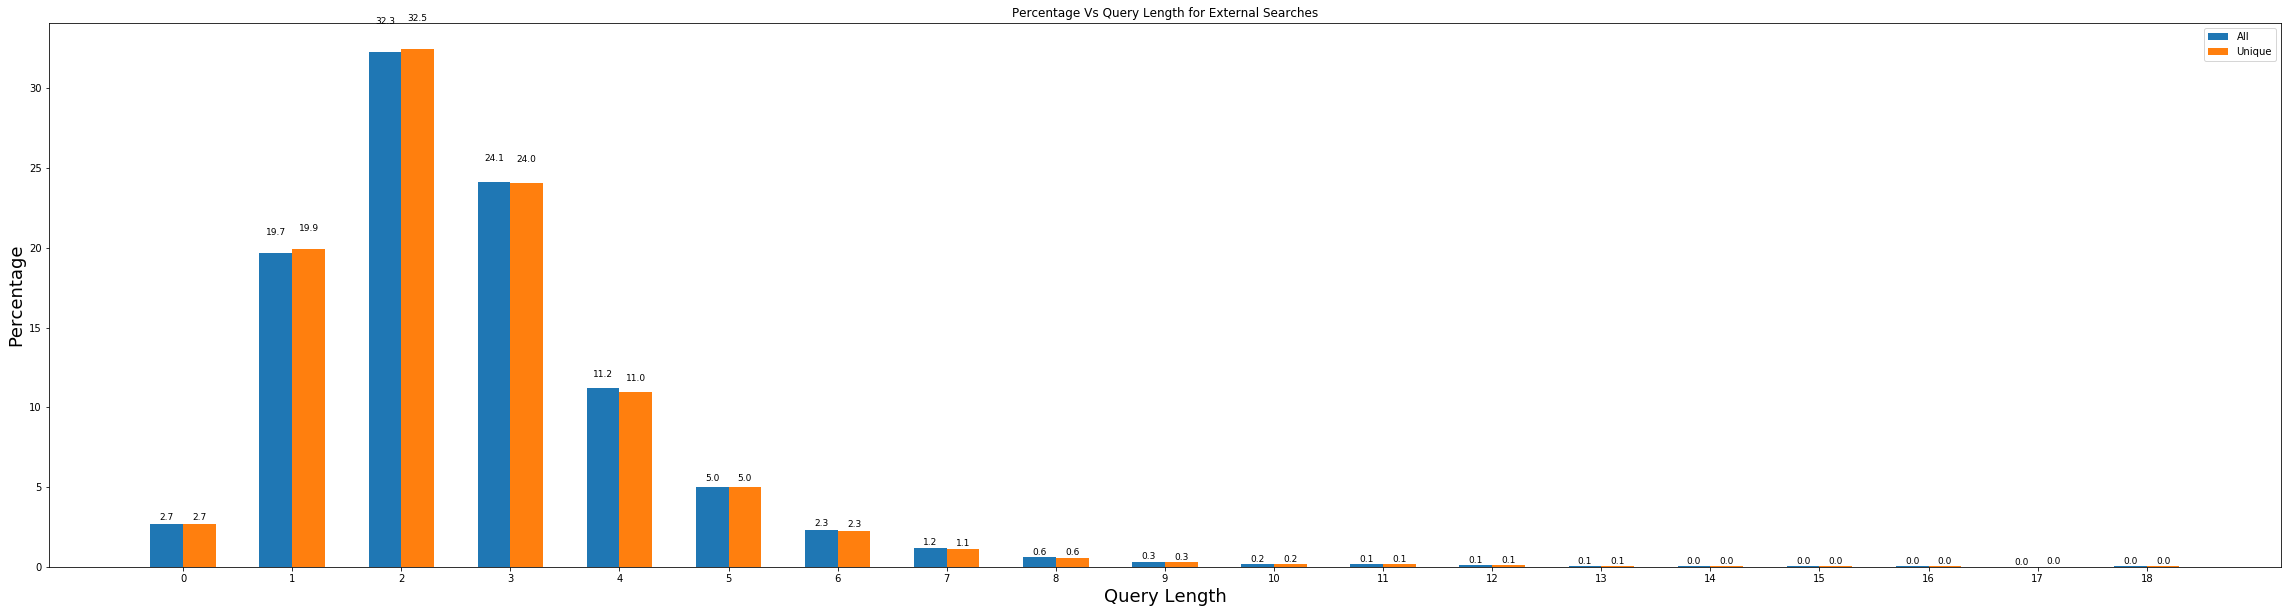

In [119]:
#FIGURE 6:
fig, ax = plt.subplots(figsize=(40,10))
ind = lengths    # the x locations for the groups
width = 0.3      # the width of the bars
p1 = ax.bar(ind, external_all_counts, width, bottom=0 )
p2 = ax.bar(ind + width, external_clean_counts, width, bottom=0)
ax.set_title('Percentage Vs Query Length for External Searches')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(lengths)
plt.xlabel('Query Length', fontsize=18)
plt.ylabel('Percentage',  fontsize=18)
ax.legend((p1[0], p2[0]), ('All', 'Unique'))
ax.autoscale_view()
autolabel(p1)
autolabel(p2)
plt.show()